In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
import seaborn as sns

In [58]:
# collecting data
df = pd.read_csv('titanic_data.csv')

In [59]:
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [60]:
print(len(df))


891


In [61]:
print(df.columns)
print(df.info)
print(df.describe())
print(df.dtypes)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Li

Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891
AxesSubplot(0.125,0.11;0.775x0.77)


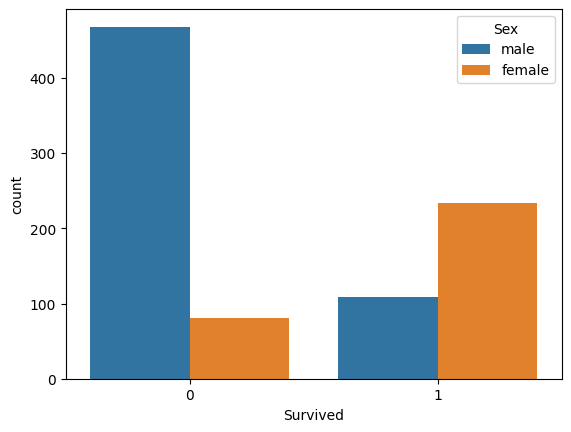

In [62]:
print(pd.crosstab(df['Survived'], df.Sex, margins=True ))
print(sns.countplot(x="Survived", data=df, hue='Sex'))
plt.show()

In [63]:
print(df.isnull().sum())
print(df.isna())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   F

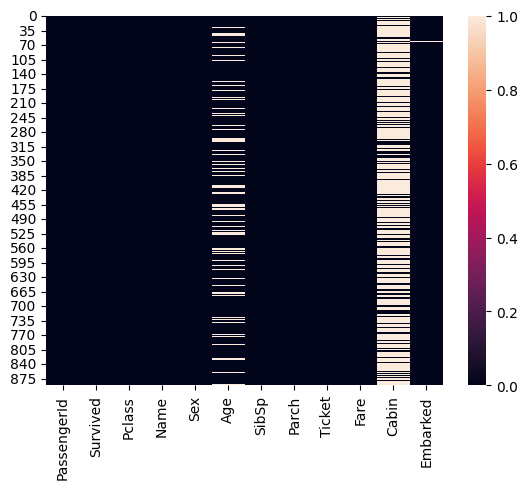

In [64]:
sns.heatmap(df.isna())
plt.show()

In [65]:
# wrangling
# percentAge of null values

null_values_percentage_AGE = df.Age.isna().sum() / len(df.Age)
print(null_values_percentage_AGE*100)
null_values_percentage_Cabin = df.Cabin.isna().sum() / len(df.Cabin)
print(null_values_percentage_Cabin*100)

19.865319865319865
77.10437710437711


In [66]:
# DROP CABIN COLUMN SINCE IT HAS A LOT NULL VALUES
print(df.columns)
df.drop('Cabin', axis=1, inplace=True)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


c:\users\hp\pycharmprojects\pythonproject2\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


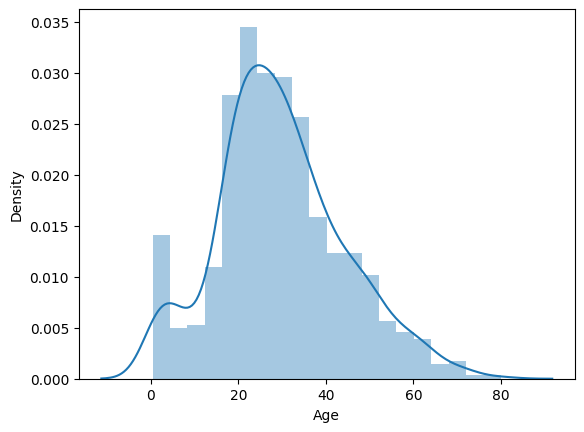

In [67]:
sns.distplot(df['Age'])
plt.show()
# max number of people were in age group 15 to 40

In [68]:
# FILLING MISSING AGE VALUES WITH MEAN OF AGE
print(df['Age'].isna().sum())
df["Age"].fillna(df["Age"].mean(), inplace=True)
print(df['Age'].isna().sum())

177
0


In [69]:
# in gender changing make male == 1 and female == 0
change = pd.get_dummies(df.Sex, drop_first=True)
print(change)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]


In [70]:
print(df.columns)
# df.drop("Sex",axis=1,inplace=True)
# print(df.Sex.head())
df['sex'] = change
print(df.Sex.head())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [72]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


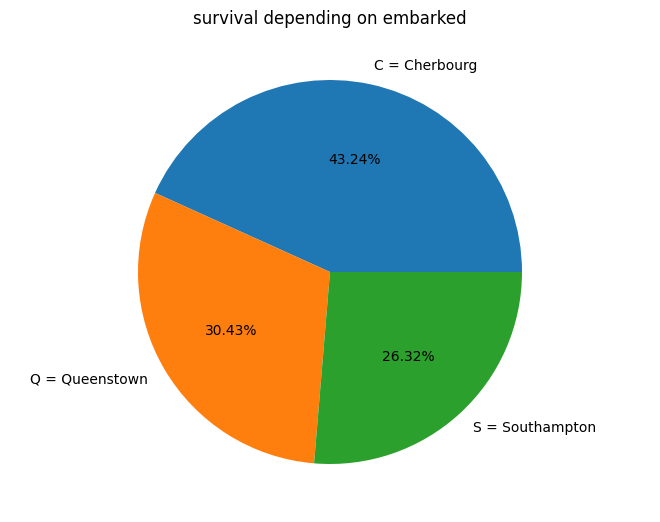

In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.title("survival depending on embarked")
plt.show()

In [74]:
df.drop(['Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
#print(df.columns)

In [75]:
# df["Age"].fillna(df["Age"].mean(),inplace=True)
print(df["Age"].isnull().sum())

0


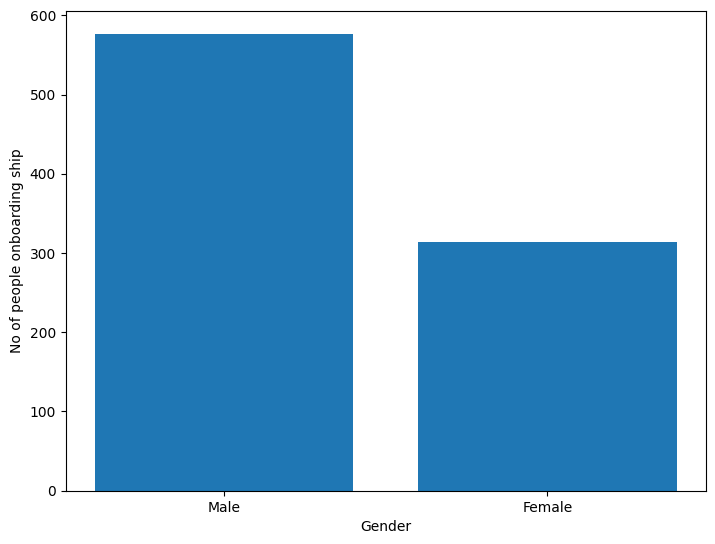

In [76]:
#Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

In [77]:
alive = len(df[df['Survived'] == 1])
dead = len(df[df['Survived'] == 0])
df.groupby('sex')[['Survived']].mean()

,Survived
sex,
0,0.742038
1,0.188908


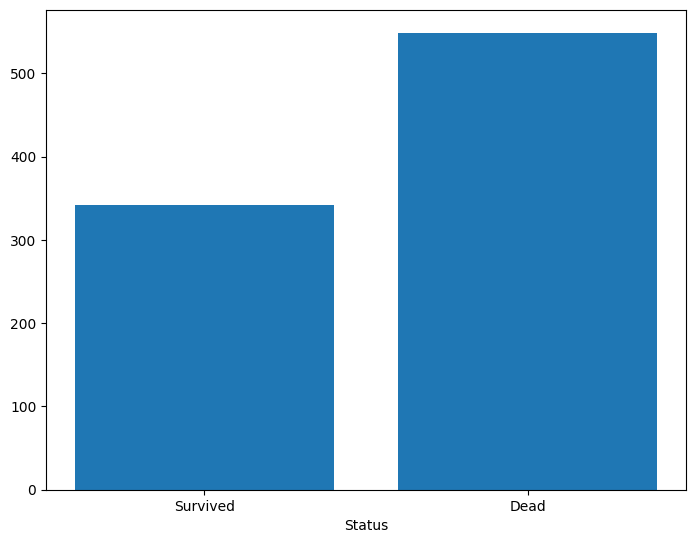

In [78]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, "Bar graph of people according to ticket class in which people couldn't survive")

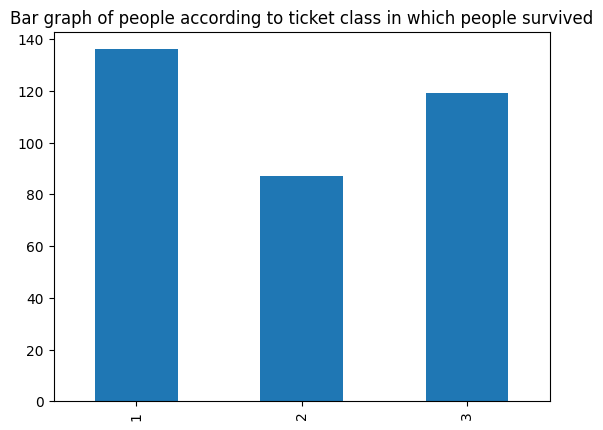

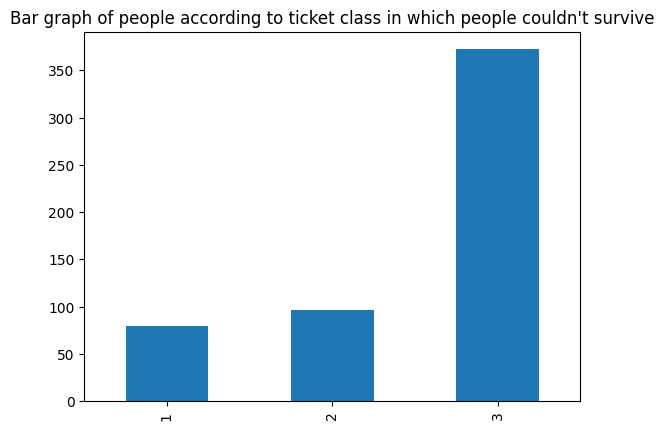

In [79]:
plt.figure(1)
df.loc[df['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people survived')


plt.figure(2)
df.loc[df['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people couldn\'t survive')

([<matplotlib.axis.XTick at 0x279f2c60fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

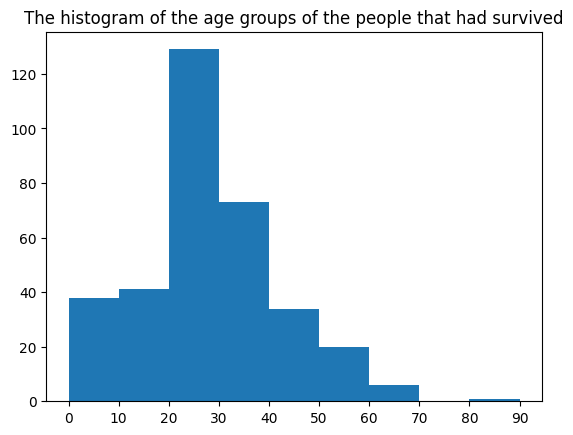

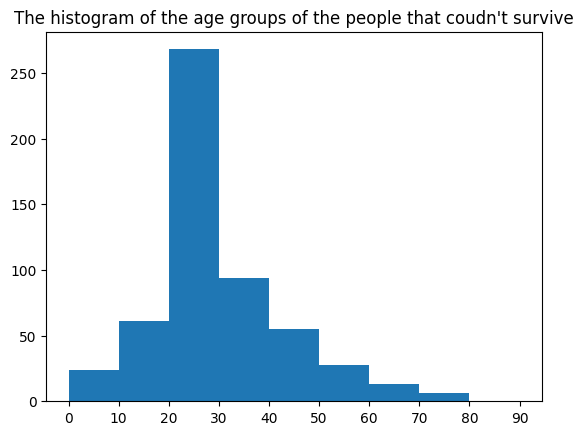

In [80]:
plt.figure(1)
age  = df.loc[df.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = df.loc[df.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [81]:
print(df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
84,70.00,0.0
85,70.50,0.0
86,71.00,0.0
87,74.00,0.0
